In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
from sklearn.decomposition import PCA
import seaborn as sns

## Load in Centrality Data Set

In [9]:
centralities = pd.read_excel("centralities.xlsx")
centralities = centralities.drop(["Unnamed: 0"],axis=1)

## Standardise Data 

In [3]:
normalised_centralities = pd.DataFrame()
for centrality in centralities.columns:
    if centrality != "Names":
        cents = np.array(centralities[centrality].astype('float'))
        mean = np.mean(cents)
        sd = np.std(cents)
        cents_norm = (cents - mean) / sd
        normalised_centralities[centrality] = cents_norm
    else:
        normalised_centralities[centrality] = centralities[centrality]


## Plot Relationships

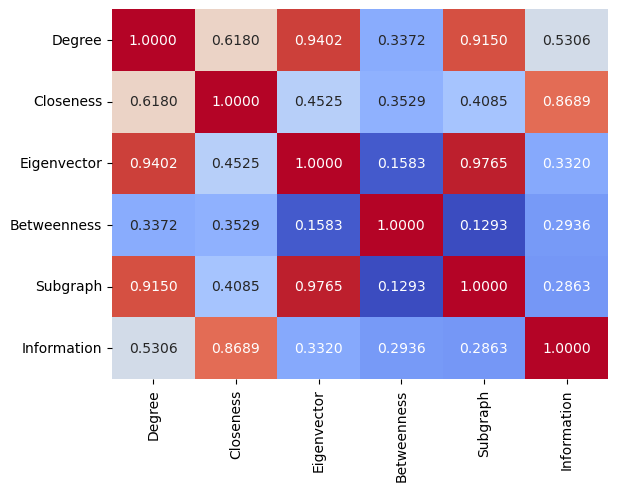

In [4]:
normalised_centralities_noname = normalised_centralities.drop(["Names"],axis=1)
correlations = normalised_centralities_noname.corr()
correlations.style.background_gradient(cmap='coolwarm')

fig, ax = plt.subplots()
sns.heatmap(correlations, annot=True, fmt='.4f', 
            cmap=plt.get_cmap('coolwarm'), cbar=False, ax=ax)
ax.set_yticklabels(ax.get_yticklabels(), rotation="horizontal")
plt.savefig('correlation.png', bbox_inches='tight', pad_inches=0.0)

<Figure size 640x480 with 0 Axes>

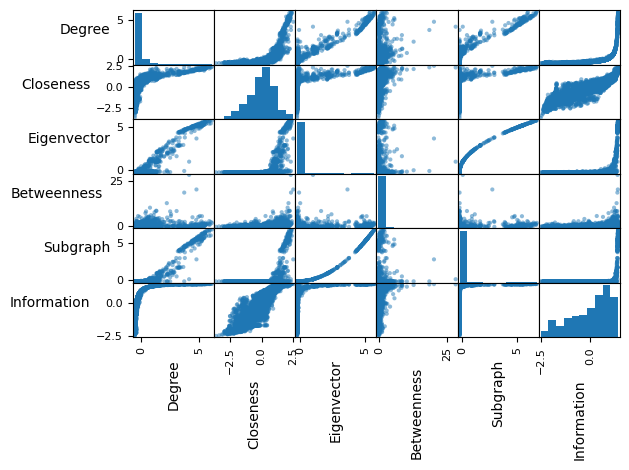

In [5]:
plt.figure()
axes = pd.plotting.scatter_matrix(normalised_centralities_noname, diagonal='hist')

for ax in axes.flatten():
    ax.xaxis.label.set_rotation(90)
    ax.yaxis.label.set_rotation(0)
    ax.yaxis.label.set_ha('right')

plt.tight_layout()
plt.gcf().subplots_adjust(wspace=0, hspace=0)
plt.savefig("centrality_plots.png")
plt.show()

## Dropping Redundant Centrality Measures

In [14]:
normalised_centralities = normalised_centralities.drop(["Subgraph"],axis=1)
normalised_centralities_noname = normalised_centralities_noname.drop(["Subgraph"],axis=1)

## Compute PCA Index

In [94]:
pca = PCA(n_components = 5)
pca.fit(normalised_centralities_noname)

PCA(n_components=5)

In [95]:
# Eigenvalues of Component Vectors
component_eigenvalues = pca.explained_variance_
component_eigenvalues

array([3.04301865, 1.01369785, 0.79740531, 0.12265884, 0.02435727])

In [96]:
# Percentage of Variance Explained by Each Component Vector
explained_variance = pca.explained_variance_ratio_
explained_variance.round(3)

array([0.608, 0.203, 0.159, 0.025, 0.005])

In [97]:
# Eigenvectors Corresponding to Each of the Components
vectors = pca.components_
vectors

array([[ 0.51956047,  0.49785028,  0.44507882,  0.27220439,  0.45827026],
       [-0.38361188,  0.31806492, -0.61034409,  0.46077482,  0.40846455],
       [ 0.13101727, -0.30709895,  0.10956681,  0.83737491, -0.41871599],
       [-0.14769514,  0.74587037,  0.02443823, -0.03073168, -0.64832235],
       [ 0.73750896,  0.01863957, -0.64558719, -0.10700539, -0.1658316 ]])

In [98]:
weights = np.abs(vectors) / np.sum(np.abs(vectors), axis=1 ,keepdims=True)
weights

array([[0.23692154, 0.22702162, 0.20295763, 0.12412623, 0.20897298],
       [0.17586708, 0.14581704, 0.27981259, 0.21124248, 0.1872608 ],
       [0.07263508, 0.17025357, 0.0607431 , 0.46423496, 0.2321333 ],
       [0.09247952, 0.4670278 , 0.01530203, 0.01924268, 0.40594797],
       [0.4404162 , 0.01113094, 0.38552354, 0.06390012, 0.0990292 ]])

In [100]:
#Taking weights of only the first component:
weights[:1]

array([[0.23692154, 0.22702162, 0.20295763, 0.12412623, 0.20897298]])

$$\text{X} = 0.237 \times \text{Degree} + 0.227 \times \text{Closeness} + 0.203 \times \text{Eigenvector} + 0.124 \times \text{Betweenness} + 0.209 \times \text{Information} $$

## Analysis Using Two Principal Components

In [111]:
pca2 = PCA(n_components = 2)
new_data = pca2.fit_transform(normalised_centralities_noname)

In [112]:
new_data_df = pd.DataFrame(data = new_data
             , columns = ['principal component 1', 'principal component 2'])

In [113]:
new_data_df

,principal component 1,principal component 2
0,-1.320808,-0.571440
1,0.412452,0.531388
2,-0.109262,0.546606
3,-0.845181,-0.172228
4,0.842118,0.827193
...,...,...
4390,-2.279377,-1.178297
4391,-1.826101,-0.862942
4392,-0.857643,-0.201137
4393,-1.813378,-0.868507


<Figure size 640x480 with 0 Axes>

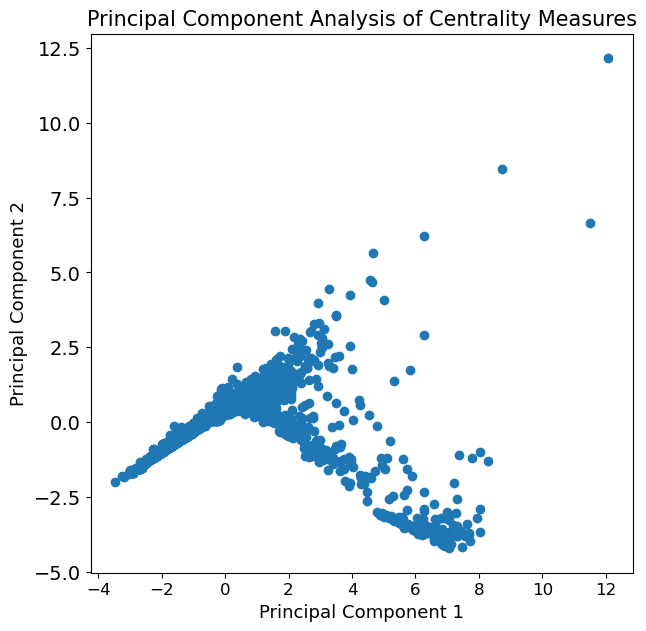

In [138]:
plt.figure()
plt.figure(figsize=(7,7))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component 1',fontsize=13)
plt.ylabel('Principal Component 2',fontsize=13)
plt.title("Principal Component Analysis of Centrality Measures",fontsize=15)
plt.scatter(new_data_df['principal component 1'], new_data_df['principal component 2'])
plt.savefig("two_components.png")
plt.show()

In [135]:
normalised_centralities_noname
betweenness_rate = []
for i in range(len(np.array(normalised_centralities_noname["Betweenness"]))):
    if np.array(normalised_centralities_noname["Betweenness"])[i] < np.mean(np.array(normalised_centralities_noname["Betweenness"])):
        betweenness_rate.append("Low")
    else:
        betweenness_rate.append("High")

In [145]:
new_data_df["Betweenness Rating"] = betweenness_rate

In [146]:
new_data_df

,principal component 1,principal component 2,Betweenness Rating
0,-1.320808,-0.571440,Low
1,0.412452,0.531388,Low
2,-0.109262,0.546606,High
3,-0.845181,-0.172228,Low
4,0.842118,0.827193,High
...,...,...,...
4390,-2.279377,-1.178297,Low
4391,-1.826101,-0.862942,Low
4392,-0.857643,-0.201137,Low
4393,-1.813378,-0.868507,Low


In [147]:
low = new_data_df.loc[new_data_df["Betweenness Rating"] == "Low"]

In [148]:
high = new_data_df.loc[new_data_df["Betweenness Rating"] == "High"]

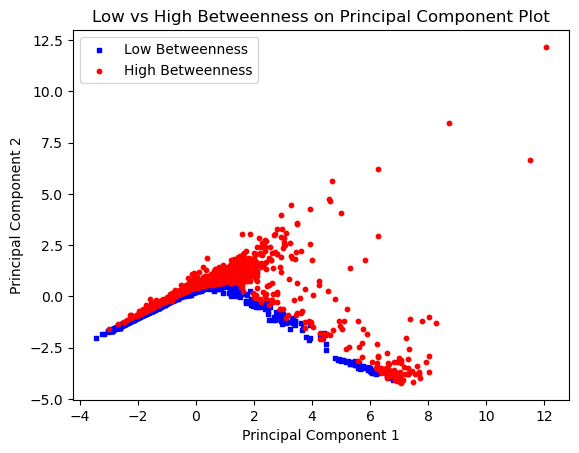

In [152]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
plt.title("Low vs High Betweenness on Principal Component Plot")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
ax1.scatter(low["principal component 1"], low["principal component 2"], s=10, c='b', marker="s", label='Low Betweenness')
ax1.scatter(high["principal component 1"],high["principal component 2"], s=10, c='r', marker="o", label='High Betweenness')
plt.legend(loc='upper left')
plt.savefig("between.png")
plt.show()
